In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
full_path = "data/HiGly008.full.merged.output.csv"
bind_path = "data/Antibody binding correct.xlsx"

df_full = pd.read_csv(full_path)
df_bind = pd.read_excel(bind_path)
print(df_full.shape)
print(df_bind.shape)

(606, 131)
(1327, 8)


In [3]:
df_full.head()

,Unnamed: 0,WELL_ID,H_N,H_N_IF,K_N,K_N_IF,L_N,L_N_IF,ONE_LIGHT_CHAIN,ONE_LIGHT_CHAIN_IF,...,NVDNS_L,NDJNS_L,AA@CYS1_L,AA@CYS2_L,AA@JINV_L,NVBASES_L,NVSUBSTITUTIONS_L,NVINSERTIONS_L,NVDELETIONS_L,NUMBER_DROPPED_LT10_L
0,0,HiGly008_P10A1,1,1,1,1,0,0,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,HiGly008_P10A9,1,1,1,1,0,0,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,HiGly008_P10B8,1,1,1,1,0,0,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,HiGly008_P10B9,1,1,1,1,0,0,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,HiGly008_P10C10,0,0,1,1,0,0,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_bind.head()

,Sample,1JPLm414_C_G1,1JPLm414_T_G3_PAPRE,1JPL_4I_Avi,1JPL_WT_Avi,A/Hong Kong/1/1968,HK68head avi bio,H3/Johannesberg/94 avi bio
0,P1-A1,8.95156,10.19336,4.54219,8.16465,16.54180,2.31758,6.66055
1,P40-G1,201835.22000,199567.39000,50441.56000,8.61621,60357.18800,50693.07400,1174.88930
2,P38-F7,186353.53000,187263.88000,42311.35500,4.75801,39976.96000,39165.90600,685.10000
3,P1-A9,11.45840,12.18887,1.38789,2.88535,15.98564,3.18086,2.37402
4,P1-B2,11.92490,5.94170,4.70156,5.65283,16.13672,1.73818,7.56699


In [5]:
HC_col = df_full.columns[27]   # AB column
LC_col = df_full.columns[66]   # BO column

print("HC column:", HC_col)
print("LC column:", LC_col)

HC column: VDJ_AA_H
LC column: VJ_AA_K


In [8]:
df_full = df_full.rename(columns={"WELL_ID": "Sample"})

In [9]:
df_bind["Sample"] = (
    df_bind["Sample"]
    .astype(str)
    .str.replace("-", "", regex=False)
    .str.strip()
)

df_full["Sample"] = (
    df_full["Sample"]
    .astype(str)
    .str.replace("HiGly008_", "", regex=False)
    .str.strip()
)

In [10]:
full_ids = (
    df_full["Sample"]
    .astype(str)
    .str.replace("HiGly008_", "", regex=False)
    .str.strip()
)

bind_ids = (
    df_bind["Sample"]
    .astype(str)
    .str.strip()
)

# Count overlaps
matches = set(full_ids).intersection(set(bind_ids))

print("Number of matching samples:", len(matches))

Number of matching samples: 563


In [11]:
binding_cols = {
    "C": "1JPLm414_C_G1",
    "T": "1JPLm414_T_G3_PAPRE",
    "4i": "1JPL_4I_Avi",
    "WT": "1JPL_WT_Avi",
    "HK": "A/Hong Kong/1/1968"
}

In [12]:
merged_df = pd.merge(
    df_full,
    df_bind,
    on="Sample",
    how="inner"
)

print("Merged dataframe shape:", merged_df.shape)
merged_df.head()

Merged dataframe shape: (606, 138)


,Unnamed: 0,Sample,H_N,H_N_IF,K_N,K_N_IF,L_N,L_N_IF,ONE_LIGHT_CHAIN,ONE_LIGHT_CHAIN_IF,...,NVINSERTIONS_L,NVDELETIONS_L,NUMBER_DROPPED_LT10_L,1JPLm414_C_G1,1JPLm414_T_G3_PAPRE,1JPL_4I_Avi,1JPL_WT_Avi,A/Hong Kong/1/1968,HK68head avi bio,H3/Johannesberg/94 avi bio
0,0,P10A1,1,1,1,1,0,0,True,True,...,NaN,NaN,NaN,19.30430,61101.92000,4.92734,11.94316,15.01113,6.88467,6.93945
1,1,P10A9,1,1,1,1,0,0,True,True,...,NaN,NaN,NaN,13.64316,5.35732,10.03398,27.38594,14.69570,13.60332,4.50566
2,2,P10B8,1,1,1,1,0,0,True,True,...,NaN,NaN,NaN,823.81270,197.29960,7.75127,7.38604,17.50137,5.13320,6.07949
3,3,P10B9,1,1,1,1,0,0,True,True,...,NaN,NaN,NaN,10.78438,1796.06670,10.53535,5.89687,17.81348,6.92285,5.92842
4,4,P10C10,0,0,1,1,0,0,True,True,...,NaN,NaN,NaN,8393.42100,20008.94100,3.26387,6.77344,16.19648,8.18457,4.99541


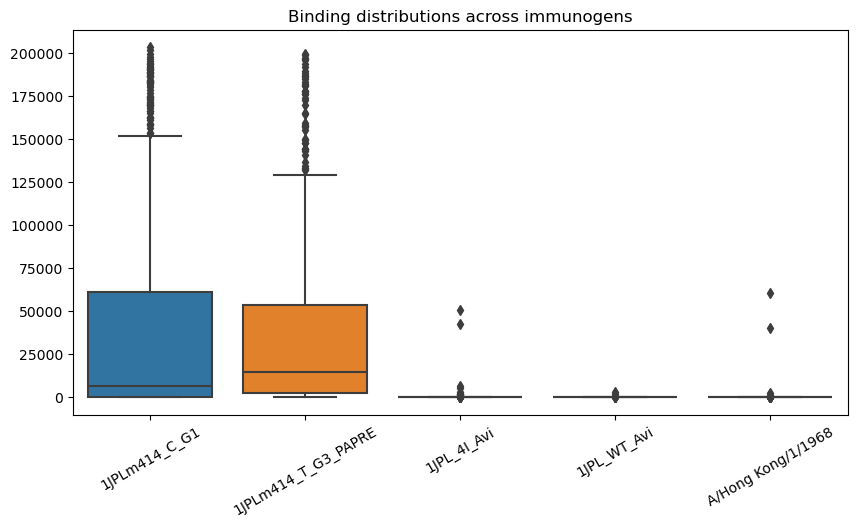

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(data=merged_df[list(binding_cols.values())])
plt.xticks(rotation=30)
plt.title("Binding distributions across immunogens")
plt.show()

/opt/apps/rhel9/Anaconda3-2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/apps/rhel9/Anaconda3-2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/apps/rhel9/Anaconda3-2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/apps/rhel9/Anaconda3-2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

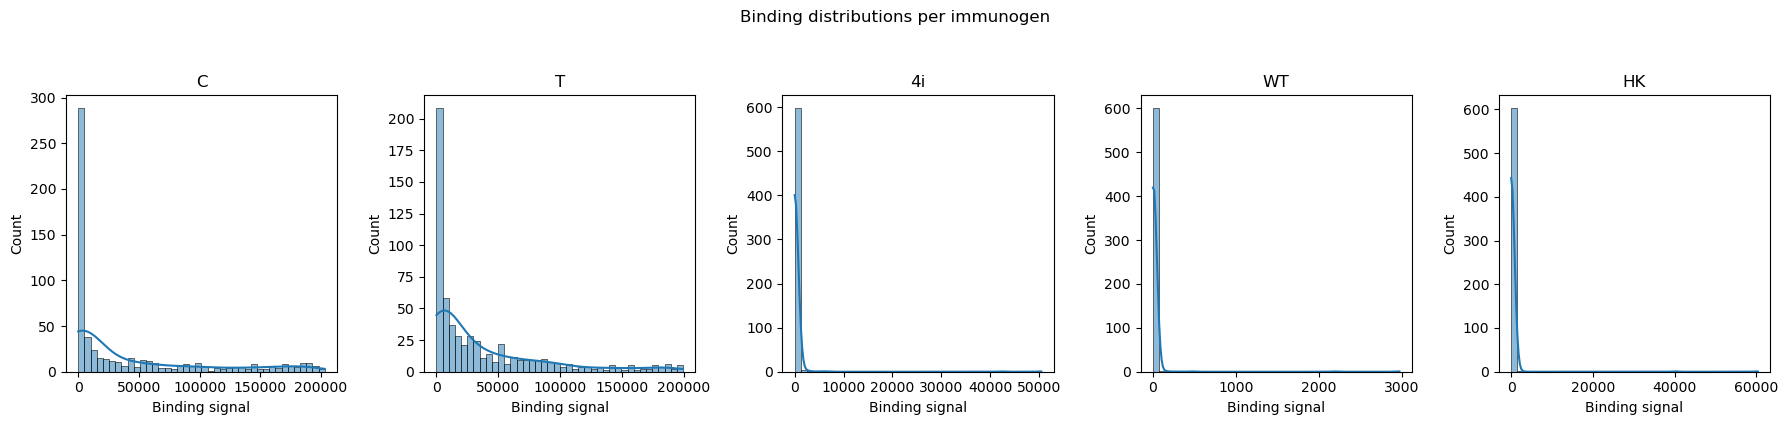

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, len(binding_cols), figsize=(18,4), sharey=False)

for ax, (name, col) in zip(axes, binding_cols.items()):
    sns.histplot(
        merged_df[col],
        bins=40,
        ax=ax,
        kde=True
    )
    ax.set_title(name)
    ax.set_xlabel("Binding signal")

plt.suptitle("Binding distributions per immunogen", y=1.05)
plt.tight_layout()
plt.show()

/opt/apps/rhel9/Anaconda3-2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/apps/rhel9/Anaconda3-2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/apps/rhel9/Anaconda3-2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/apps/rhel9/Anaconda3-2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

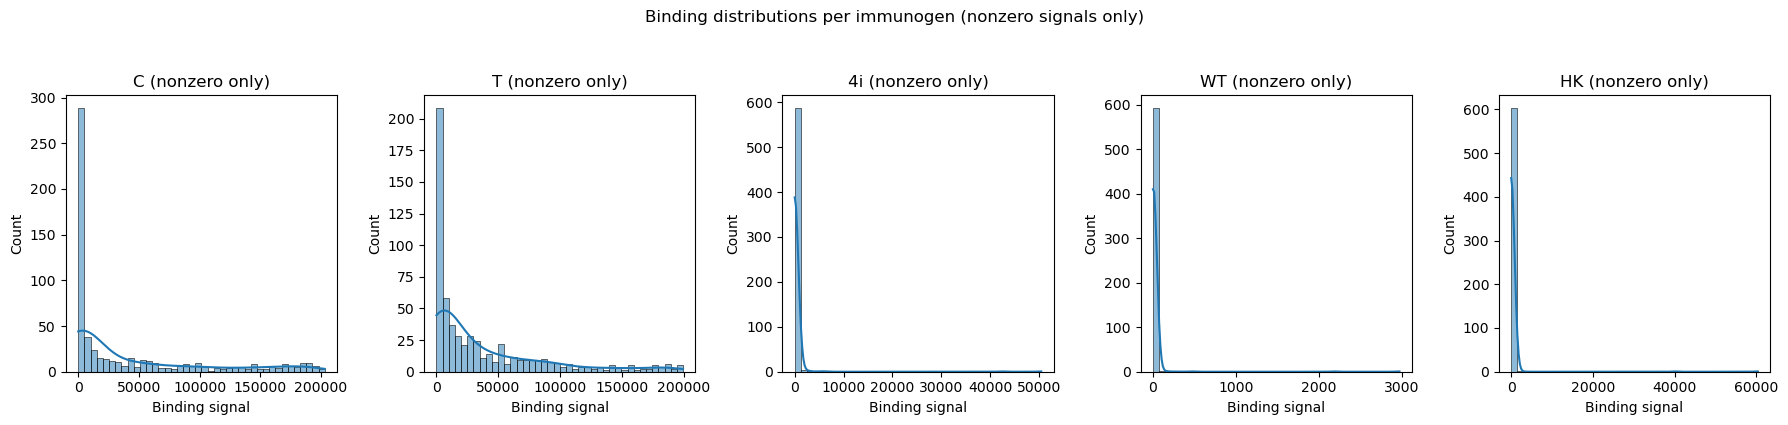

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, len(binding_cols), figsize=(18,4), sharey=False)

for ax, (name, col) in zip(axes, binding_cols.items()):
    nonzero = merged_df.loc[merged_df[col] > 0.1, col]

    sns.histplot(
        nonzero,
        bins=40,
        ax=ax,
        kde=True
    )

    ax.set_title(f"{name} (nonzero only)")
    ax.set_xlabel("Binding signal")
    ax.set_ylabel("Count")

plt.suptitle("Binding distributions per immunogen (nonzero signals only)", y=1.05)
plt.tight_layout()
plt.show()

In [16]:
out_path = "data/cleaned_data.csv"
merged_df.to_csv(out_path, index=False)

print(f"Saved merged dataframe to {out_path}")

Saved merged dataframe to data/cleaned_data.csv
